In [1]:
%matplotlib inline
import time
import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append('../scripts')

%load_ext autoreload
%autoreload 2
import TTM_analysis_utils as TTMUtil

In [2]:
from os.path import expanduser

tmp_dir = '%s/tmp' % (expanduser("~"))

fname = '%s/TTMLogStream_2017_05_24.csv' % (tmp_dir)
#fname = '%s/TTMLogStream_2017_05_17-19.csv' % (tmp_dir)
#fname = '%s/TTMLogStream_2017_05_17.csv' % (tmp_dir)
#fname = '%s/TTMLogStream_TEST.csv' % (tmp_dir)
f = open(fname, 'r')
ttm = f.readlines()
f.close()
print(len(ttm))

57475


In [3]:
ds_keys_2017_05_17_19 = [
    (30167, 'Good'),(30169, 'Good'),(30170, 'Good'),(30171, 'Good'),(30172, 'Good'),
    (30173, 'Vibration'),
    (30174, 'Good'),(30175, 'Good'),(30176, 'Good'),(30177, 'Good'),(30178, 'Good'),(30179, 'Good'),(30179, 'Good'),
    (30179, 'Good'),(30184, 'Good'),(30186, 'Good'),(30188, 'Good'),(30190, 'Good'),(30192, 'Good'),(30194, 'Good'),
    (30196, 'Good'),(30198, 'Good'),
    (30271, 'Spike'),
    (30273, 'Good'),(30275, 'Good'),(30277, 'Good'),
    (30279, 'Spike'),
    (30281, 'Good'),(30283, 'Good'),(30285, 'Good')
]

ds_keys = [
    (30380, 'Spike'),
    (30382, 'Spike'),
    (30384, 'Spike'),
    (30385, 'Spike'),
    (30386, 'Spike')
]

In [4]:
numCams = 4
cols, col_ids = TTMUtil.define_columns_and_ids(numCams)

print(cols)
print(col_ids)

['TS', 'time_s', 'C0 measx_mm', 'C0 scorex', 'C0 measy_mm', 'C0 scorey', 'C0 cmeasx_mm', 'C0 cscorex', 'C0 cmeasy_mm', 'C0 cscorey', 'C0 x unwrap cnt', 'C0 y unwrap cnt', 'C0 post measx_mm', 'C0 post measy_mm', 'C0 post cmeasx_mm', 'C0 post cmeasy_mm', 'C1 measx_mm', 'C1 scorex', 'C1 measy_mm', 'C1 scorey', 'C1 cmeasx_mm', 'C1 cscorex', 'C1 cmeasy_mm', 'C1 cscorey', 'C1 x unwrap cnt', 'C1 y unwrap cnt', 'C1 post measx_mm', 'C1 post measy_mm', 'C1 post cmeasx_mm', 'C1 post cmeasy_mm', 'C2 measx_mm', 'C2 scorex', 'C2 measy_mm', 'C2 scorey', 'C2 cmeasx_mm', 'C2 cscorex', 'C2 cmeasy_mm', 'C2 cscorey', 'C2 x unwrap cnt', 'C2 y unwrap cnt', 'C2 post measx_mm', 'C2 post measy_mm', 'C2 post cmeasx_mm', 'C2 post cmeasy_mm', 'C3 measx_mm', 'C3 scorex', 'C3 measy_mm', 'C3 scorey', 'C3 cmeasx_mm', 'C3 cscorex', 'C3 cmeasy_mm', 'C3 cscorey', 'C3 x unwrap cnt', 'C3 y unwrap cnt', 'C3 post measx_mm', 'C3 post measy_mm', 'C3 post cmeasx_mm', 'C3 post cmeasy_mm']
OrderedDict([('TS', 0), ('time_s', 1), 

In [8]:
data_ranges, data_sets_rough = TTMUtil.parse_into_data_sets(ttm)

Data set 0, range: 0 - 11627 (total: 11627)
Data set 1, range: 11628 - 23145 (total: 11517)
Data set 2, range: 23146 - 34321 (total: 11175)
Data set 3, range: 34322 - 45952 (total: 11630)
Data set 4, range: 45953 - 57471 (total: 11518)
[0] range: doTTMClientWork: 2017-05-24 14:30:34.475 -> doTTMClientWork: 2017-05-24 14:31:04.669
[1] range: doTTMClientWork: 2017-05-24 14:39:35.455 -> doTTMClientWork: 2017-05-24 14:40:05.658
[2] range: doTTMClientWork: 2017-05-24 14:46:16.624 -> doTTMClientWork: 2017-05-24 14:46:46.825
[3] range: doTTMClientWork: 2017-05-24 14:46:53.366 -> doTTMClientWork: 2017-05-24 14:47:23.570
[4] range: doTTMClientWork: 2017-05-24 14:47:32.838 -> doTTMClientWork: 2017-05-24 14:48:03.038


In [9]:
v= TTMUtil.validate_columns_rough(data_sets_rough)
print( "For rough data, column_cnt: num_records", v)

For rough data, column_cnt: num_records {64: 57467}


In [10]:
data_sets = []
for idx, data_set in enumerate(data_sets_rough):
    data_sets.append(TTMUtil.cleanup_and_format_data_set(data_set))

In [11]:
v= TTMUtil.validate_columns_cleanedup(data_sets)
print( "For cleaned-up data, column_cnt: num_records", v)

For cleaned-up data, column_cnt: num_records {58: 57467}


In [49]:
ds = data_sets[0]  #Xiaoming thinks this one had spike...

# for col_id in col_ids.keys():
#     print("%s [%d]: %s" % (col_id, col_ids[col_id], str(ds[15][4][col_ids[col_id]])))
#     #print("%s: " % (col_id))
count =len(ds)
print("count:", count)

# for idx, ds in enumerate(data_sets):
#     print("[%d] len: %d" %(idx, len(ds)))

count: 11627


In [11]:
TTMUtil.unwrap(-0.0003709, -0.002479, 0)

(2, -0.0023709)

In [12]:
TTMUtil.unwrap(ds[15][col_ids['C3 measx_mm']], ds[15][col_ids['C3 cmeasx_mm']], ds[15][col_ids['C3 cscorex']])


(2, -0.0023709)

In [50]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()

In [12]:
for idx, ds in enumerate(data_sets):
    validx = {0:0, 1:0, 2:0, 3:0, 4:0}
    validy = {0:0, 1:0, 2:0, 3:0, 4:0}
    validx_records = []
    validy_records = []
    for d in ds:
        x = 4-(d[col_ids['C0 cscorex']] + d[col_ids['C1 cscorex']] + d[col_ids['C2 cscorex']] + d[col_ids['C3 cscorex']])
        if x not in validx:
            validx[x] = 0
        else:
            validx[x] += 1

        y = 4-(d[col_ids['C0 cscorey']] + d[col_ids['C1 cscorey']] + d[col_ids['C2 cscorey']] + d[col_ids['C3 cscorey']])
        if y not in validy:
            validy[y] = 0
        else:
            validy[y] += 1

    df = pd.DataFrame.from_records(ds, columns=cols)
    df_c0x = df['C0 post measx_mm']
    df_c0y = df['C0 post measy_mm']
    df_c1x = df['C1 post measx_mm']
    df_c1y = df['C1 post measy_mm']
    df_c2x = df['C2 post measx_mm']
    df_c2y = df['C2 post measy_mm']
    df_c3x = df['C3 post measx_mm']
    df_c3y = df['C3 post measy_mm']

    #     if d[col_ids['C0 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C1 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C2 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C3 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C0 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C1 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C2 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C3 cscorey']] == 0: validy_cnt += 1
    
    print("-------------------------------------------------")
    print("Dataset num: %d, template: %d, XLu's note: %s" % (idx, ds_keys[idx][0], ds_keys[idx][1]))
    print("valid x cnts:", validx)
    print("valid y cnts:", validy)
    print("C0 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0x.min(), df_c0x.max(), df_c0x.mean(),df_c0x.std()))
    print("C0 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0y.min(), df_c0y.max(), df_c0y.mean(),df_c0y.std()))
    print("C1 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1x.min(), df_c1x.max(), df_c1x.mean(),df_c1x.std()))
    print("C1 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1y.min(), df_c1y.max(), df_c1y.mean(),df_c1y.std()))
    print("C2 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2x.min(), df_c2x.max(), df_c2x.mean(),df_c2x.std()))
    print("C2 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2y.min(), df_c2y.max(), df_c2y.mean(),df_c2y.std()))
    print("C3 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3x.min(), df_c3x.max(), df_c3x.mean(),df_c3x.std()))
    print("C3 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3y.min(), df_c3y.max(), df_c3y.mean(),df_c3y.std()))


-------------------------------------------------
Dataset num: 0, template: 30380, XLu's note: Spike
valid x cnts: {0: 38, 1: 1, 2: 0, 3: 6, 4: 11582}
valid y cnts: {0: 38, 1: 1, 2: 0, 3: 6, 4: 11582}
C0 X min: -0.000463, max: +0.000979, mean: -0.000028, std: 0.000050
C0 Y min: -0.001165, max: +0.000140, mean: -0.000126, std: 0.000053
C1 X min: -0.003730, max: +0.001536, mean: +0.000004, std: 0.000103
C1 Y min: -0.000253, max: +0.001827, mean: -0.000132, std: 0.000075
C2 X min: -0.001179, max: +0.004134, mean: +0.000033, std: 0.000099
C2 Y min: -0.000745, max: +0.004272, mean: -0.000077, std: 0.000107
C3 X min: -0.001492, max: +0.000129, mean: -0.000004, std: 0.000048
C3 Y min: -0.001418, max: +0.000733, mean: -0.000062, std: 0.000060
-------------------------------------------------
Dataset num: 1, template: 30382, XLu's note: Spike
valid x cnts: {0: 37, 1: 2, 2: 2, 3: 18, 4: 11458}
valid y cnts: {0: 37, 1: 2, 2: 2, 3: 18, 4: 11458}
C0 X min: -0.000226, max: +0.001982, mean: +0.000020

[('TS', 0), ('time_s', 1), 

('C0 measx_mm', 2), ('C0 scorex', 3), ('C0 measy_mm', 4), ('C0 scorey', 5), ('C0 cmeasx_mm', 6), ('C0 cscorex', 7), ('C0 cmeasy_mm', 8), ('C0 cscorey', 9), ('C0 x unwrap cnt', 10), ('C0 y unwrap cnt', 11), ('C0 post measx_mm', 12), ('C0 post measy_mm', 13), ('C0 post cmeasx_mm', 14), ('C0 post cmeasy_mm', 15),

('C1 measx_mm', 16), ('C1 scorex', 17), ('C1 measy_mm', 18), ('C1 scorey', 19), ('C1 cmeasx_mm', 20), ('C1 cscorex', 21), ('C1 cmeasy_mm', 22), ('C1 cscorey', 23), ('C1 x unwrap cnt', 24), ('C1 y unwrap cnt', 25), ('C1 post measx_mm', 26), ('C1 post measy_mm', 27), ('C1 post cmeasx_mm', 28), ('C1 post cmeasy_mm', 29), 

('C2 measx_mm', 30), ('C2 scorex', 31), ('C2 measy_mm', 32), ('C2 scorey', 33), ('C2 cmeasx_mm', 34), ('C2 cscorex', 35), ('C2 cmeasy_mm', 36), ('C2 cscorey', 37), ('C2 x unwrap cnt', 38), ('C2 y unwrap cnt', 39), ('C2 post measx_mm', 40), ('C2 post measy_mm', 41), ('C2 post cmeasx_mm', 42), ('C2 post cmeasy_mm', 43), 

('C3 measx_mm', 44), ('C3 scorex', 45), ('C3 measy_mm', 46), ('C3 scorey', 47), ('C3 cmeasx_mm', 48), ('C3 cscorex', 49), ('C3 cmeasy_mm', 50), ('C3 cscorey', 51), ('C3 x unwrap cnt', 52), ('C3 y unwrap cnt', 53), ('C3 post measx_mm', 54), ('C3 post measy_mm', 55), ('C3 post cmeasx_mm', 56), ('C3 post cmeasy_mm', 57)]

In [77]:
def plot_series(df, title_str, query_str, save_pdf):
    df_sub = df.query(query_str)
    
    df_labels = [
        ('Cam 0 - X', 'C0 post measx_mm', 'C0 cmeasx_mm','C0 measx_mm','C0 scorex','C0 cscorex'),
        ('Cam 0 - Y', 'C0 post measy_mm', 'C0 cmeasy_mm','C0 measy_mm','C0 scorey','C0 cscorey'),
        ('Cam 1 - X', 'C1 post measx_mm', 'C1 cmeasx_mm','C1 measx_mm','C1 scorex','C1 cscorex'),
        ('Cam 1 - Y', 'C1 post measy_mm', 'C1 cmeasy_mm','C1 measy_mm','C1 scorey','C1 cscorey'),
        ('Cam 2 - X', 'C2 post measx_mm', 'C2 cmeasx_mm','C2 measx_mm','C2 scorex','C2 cscorex'),
        ('Cam 2 - Y', 'C2 post measy_mm', 'C2 cmeasy_mm','C2 measy_mm','C2 scorey','C2 cscorey'),
        ('Cam 3 - X', 'C3 post measx_mm', 'C3 cmeasx_mm','C3 measx_mm','C3 scorex','C3 cscorex'),
        ('Cam 3 - Y', 'C3 post measy_mm', 'C3 cmeasy_mm','C3 measy_mm','C3 scorey','C3 cscorey')
    ]

    if save_pdf:
        plot_file_pdf = "%s/%s.pdf" % (tmp_dir, title_str)
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages(plot_file_pdf)
        # set the file's metadata via the PdfPages object:
        d = pdf.infodict() 
        d['Title'] = title_str
        d['Author'] = 'Tom Rafferty'
        d['Subject'] = 'TTM CanonLan Interface Analysis'
        d['CreationDate'] = datetime.datetime.today()
        d['ModDate'] = datetime.datetime.today()
        
        # setup vars to control page layout
        num_plots = len(df_labels)
        plots_per_page = num_plots
        num_pages = np.ceil(num_plots / plots_per_page)
        nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
        grid_size = (plots_per_page, 1)

        print("Creating PDF (%s) with %d pages." % (plot_file_pdf, num_pages))
        print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))
    
    #fig = plt.figure(figsize=(18,3))
    fig, axes = plt.subplots(nrows=plots_per_page, ncols=1, squeeze=True, figsize=(18,(4*plots_per_page)))
    
    for label_num, df_label in enumerate(df_labels):
        time_s = df_sub['time_s']
        post_meas = df_sub[df_label[1]]
        cmeas = df_sub[df_label[2]]
        meas = df_sub[df_label[3]]
        score = (df_sub[df_label[4]] + df_sub[df_label[5]]) / 100

        print(" ...Plotting series %d of %d" % (label_num+1, num_plots))
    #     print(len(df_col))
    #     print(len(time_s))

        delta_s = [0]
        for idx, d in enumerate(time_s):
            if idx > 0:
                delta_s.append(abs(d - d_prev))
            d_prev = d
        
        #fig, ax1 = plt.subplots(figsize=(18,3))
        #plt.subplot(num_plots,1,label_num+1)
        #ax1 = plt.gca()        
        ax1 = axes[label_num]
        
        ax1.plot(time_s, cmeas,  color='b', label='coarse')
        ax1.plot(time_s, meas,  color='g', label='fine')
        ax1.set_xlabel('time (s)')
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('cmeas, meas', color='b')
        ax1.tick_params('y', colors='b')
        ax1.set_title("%s - %s" % (title_str, df_label[0]))

        ax2 = ax1.twinx()
        ax2.plot(time_s, score,  color='m', label='score')
        ax2.plot(time_s, delta_s,  color='c', label='delta_s')
        ax2.set_ylabel('score, delta_s', color='m')
        ax2.tick_params('y', colors='m')

        leg1 = ax1.legend(loc='upper left', shadow=True)
        leg2 = ax2.legend(loc='upper right', shadow=True)
    
    plt.title(title_str)
    plt.tight_layout()
    plt.show()
                    
    if save_pdf:
#         for fig in figs:
#             fig.savefig(pdf, format='pdf')
        print("Saving pdf...")
        fig.savefig(pdf, format='pdf')
        pdf.close()


Creating PDF (/Users/traff_ss/tmp/30380.pdf) with 1 pages.
Total plots: 8, plots per page: 8
 ...Plotting series 1 of 8
 ...Plotting series 2 of 8
 ...Plotting series 3 of 8
 ...Plotting series 4 of 8
 ...Plotting series 5 of 8
 ...Plotting series 6 of 8
 ...Plotting series 7 of 8
 ...Plotting series 8 of 8


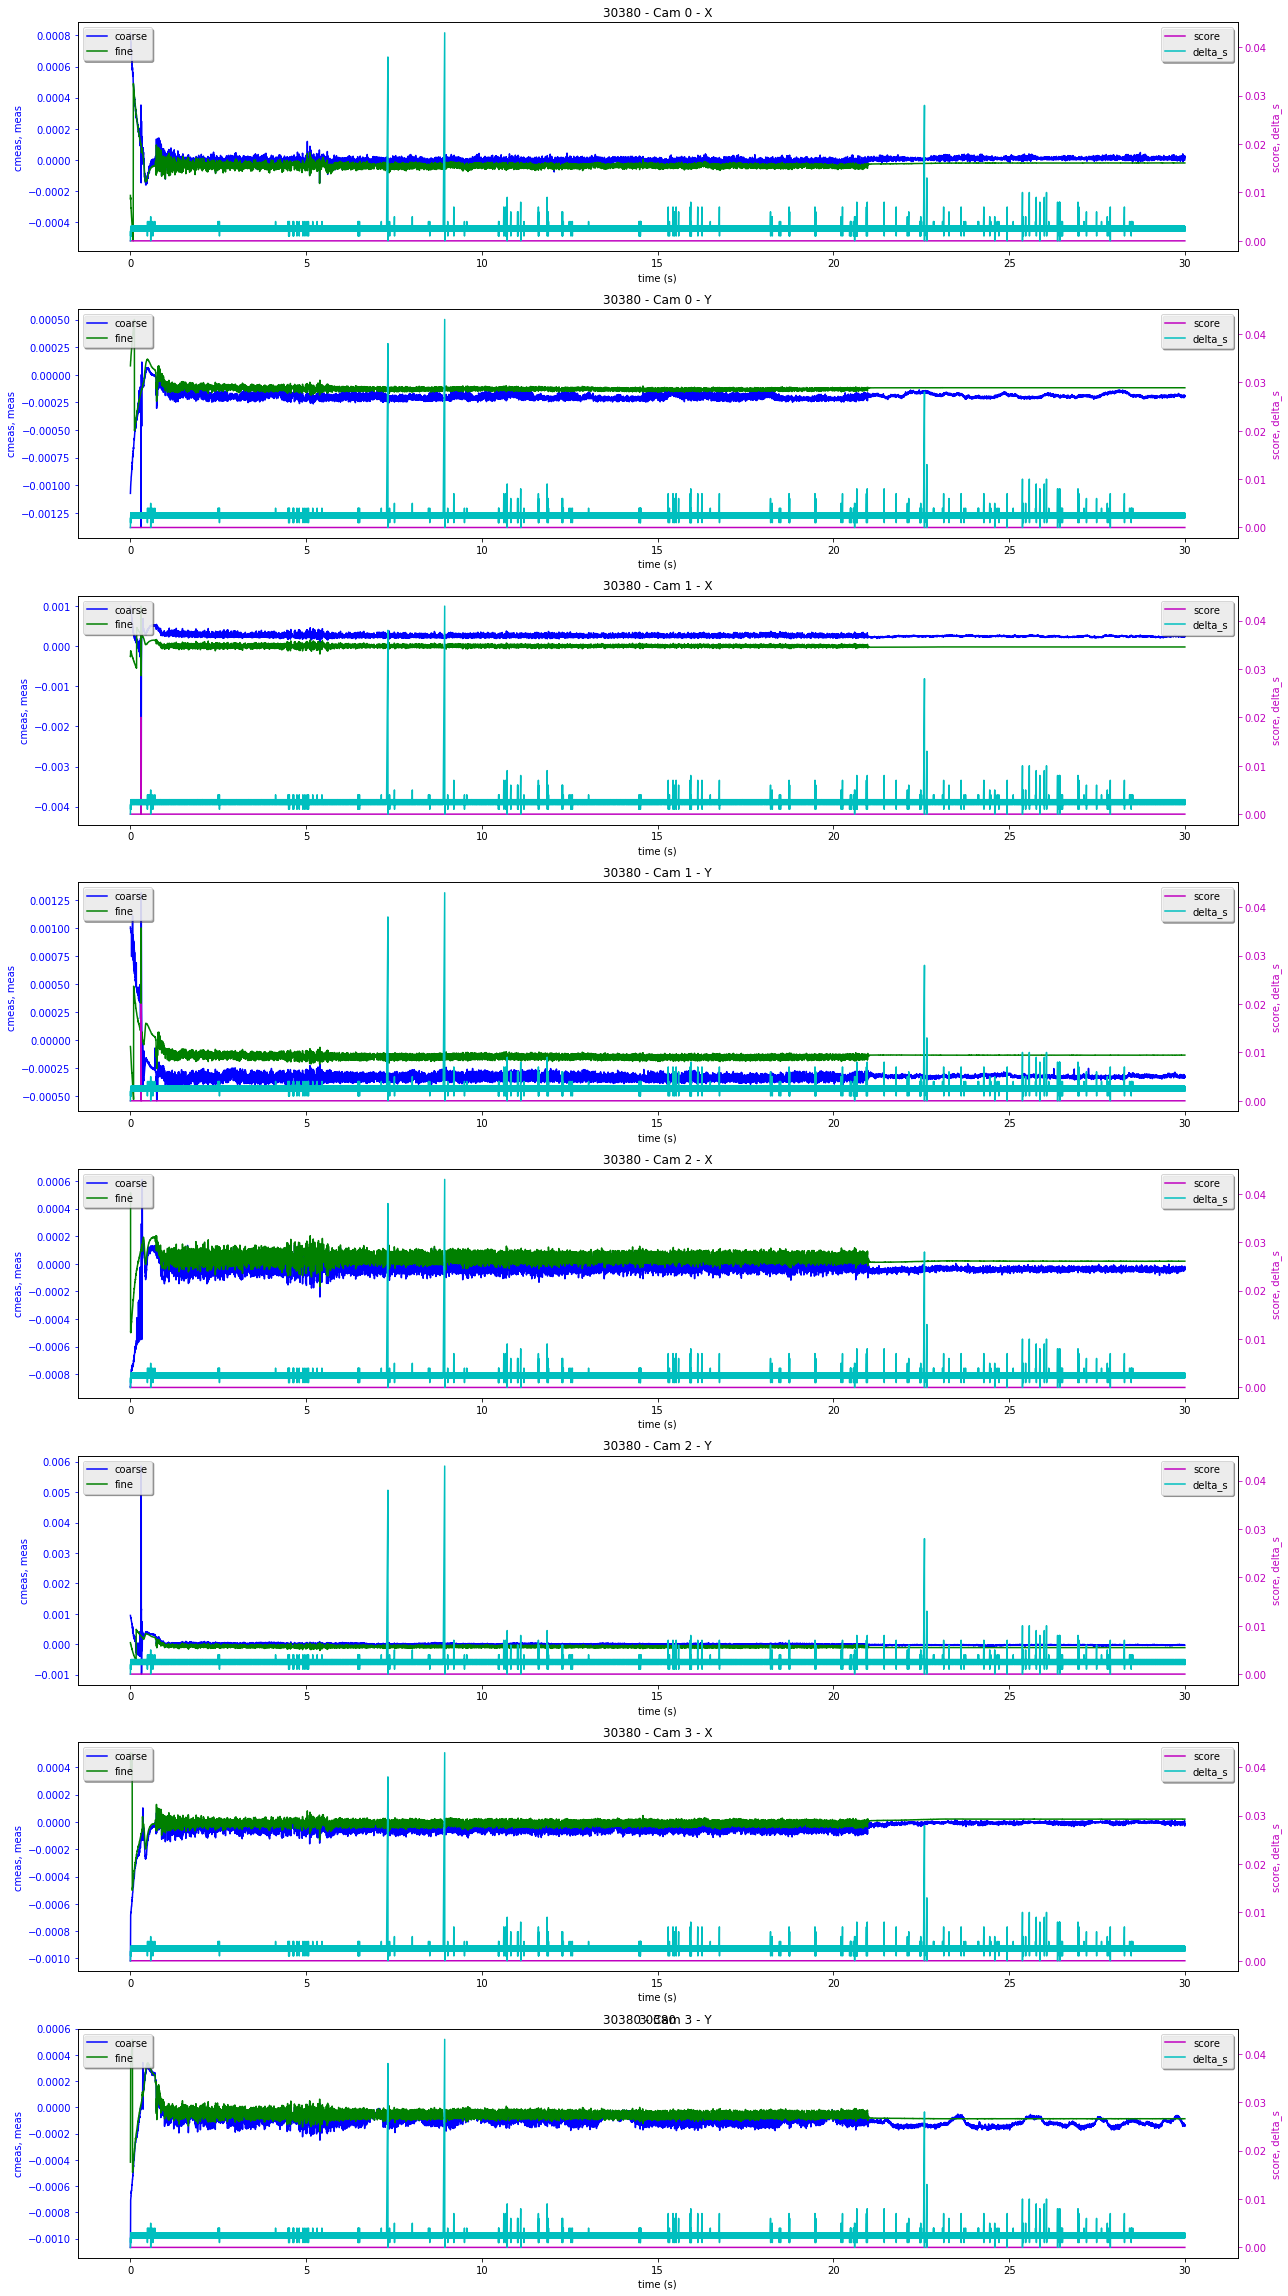

Saving pdf...


In [78]:
# 22: '20.1 <= time_s < 20.4'
# 26: '1 <= time_s < 3'

vib_sets_05_17 = [(22, '30271', '18.1 <= time_s < 22.4'),
            (22, '%s/30271_long', '1 <= time_s < 30'),
            (26, '%s/30279', '1 <= time_s < 3'),
            (26, '%s/30279_before', '1.3 <= time_s < 1.75')]

vib_sets = [(0, '30380', '0 <= time_s < 30'),
            (1, '30382', '0 <= time_s < 30'),
            (2, '30384', '0 <= time_s < 30'),
            (3, '30385', '0 <= time_s < 30'),
            (4, '30386', '0 <= time_s < 30')]
i = 0
save_pdf = True

df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)

# for i in range(len(vib_sets)):
#     plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )
plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )


In [74]:
df = pd.DataFrame.from_records(data_sets[26], columns=cols)
df_sub = df.query('1.415 <= time_s < 1.735')
#df.describe()

time_s = df_sub['time_s']
df_c0x = df_sub['C0 measx_mm']
df_c0y = df_sub['C0 measy_mm']
df_c1x = df_sub['C1 measx_mm']
df_c1y = df_sub['C1 measy_mm']
df_c2x = df_sub['C2 measx_mm']
df_c2y = df_sub['C2 measy_mm']
df_c3x = df_sub['C3 measx_mm']
df_c3y = df_sub['C3 measy_mm']

print("num pts:", len(df_c0x))

fig, ax1 = plt.subplots(figsize=(18,3))
ax1.plot(time_s, df_c0x,  color='b', label='coarse')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('cmeas, meas', color='b')
ax1.tick_params('y', colors='b')
plt.show()
time_s

IndexError: list index out of range

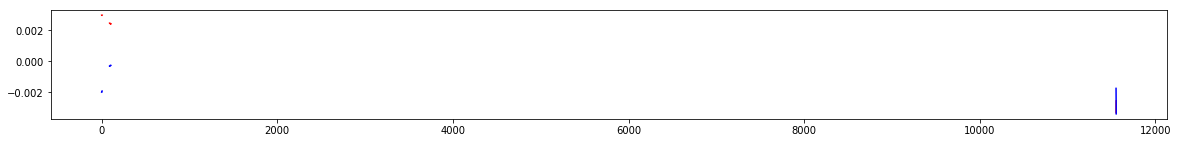

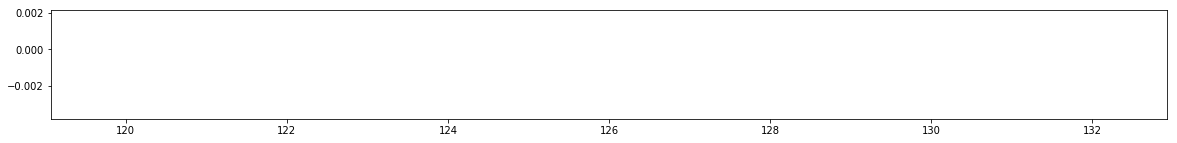

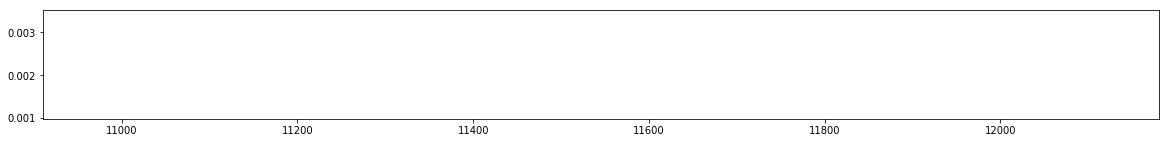

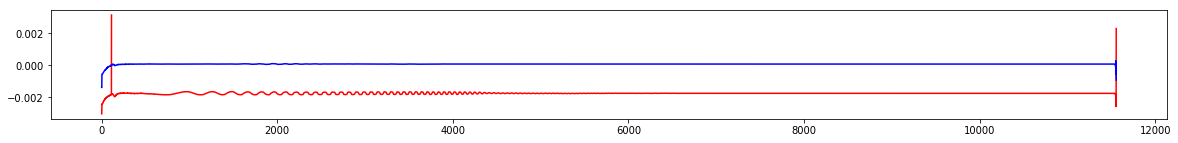

In [82]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 post measx_mm'], color='r')
plt.plot(df['C0 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 post measx_mm'], color='r')
plt.plot(df['C1 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 post measx_mm'], color='r')
plt.plot(df['C2 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 post measx_mm'], color='r')
plt.plot(df['C3 post measy_mm'], color='b')
# plt.vlines(rt_peakIdx, 0, np.max(patch_diff) + 25, color='r')
#plt.title('TTM Data')


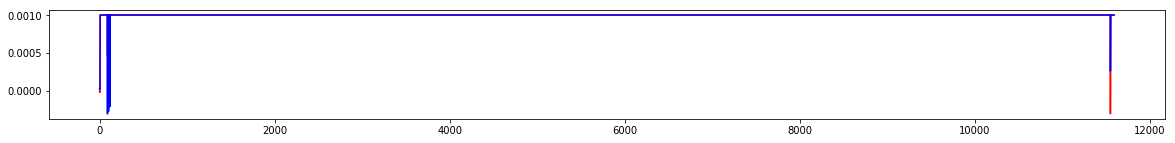

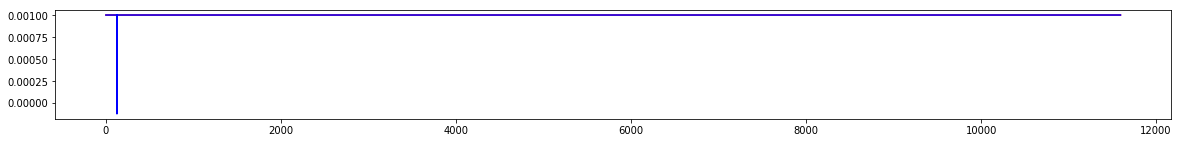

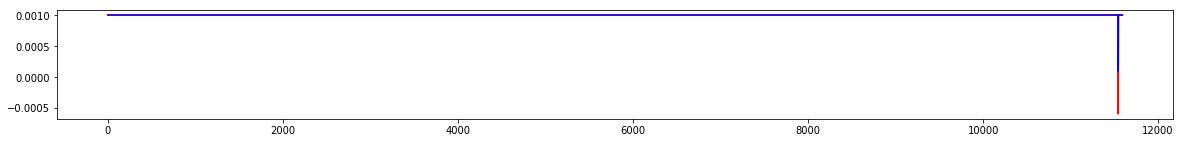

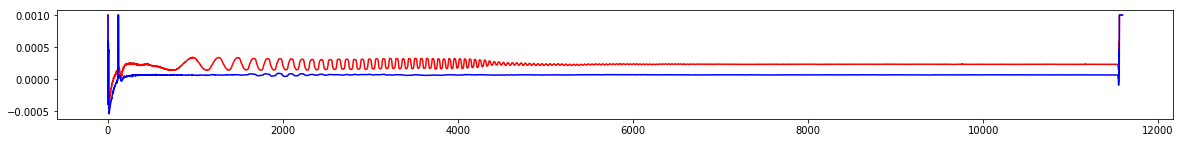

In [73]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 measx_mm'], color='r')
plt.plot(df['C0 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 measx_mm'], color='r')
plt.plot(df['C1 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 measx_mm'], color='r')
plt.plot(df['C2 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 measx_mm'], color='r')
plt.plot(df['C3 measy_mm'], color='b')
